In [77]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer

In [2]:
usarrests = pd.read_csv('USArrests.csv')
df = usarrests.copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.index = df.iloc[:,0]
df = df.drop(columns = 'Unnamed: 0')
df.index.name = None
df.head(5)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


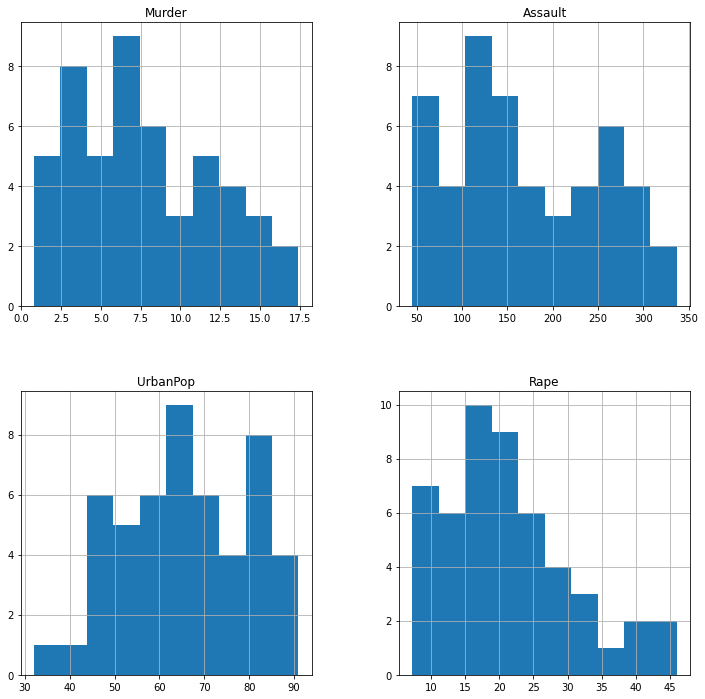

In [7]:
df.hist(figsize = (12,12));

In [8]:
#MODEL

In [9]:
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [10]:
kmeans.n_clusters

4

In [11]:
kmeans.n_init

10

In [12]:
k_model = kmeans.fit(df)

In [13]:
k_model.cluster_centers_#küme merkezleri

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [14]:
k_model.labels_

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [15]:
#VISUALIZATION

In [16]:
labels = k_model.labels_
centers = k_model.cluster_centers_

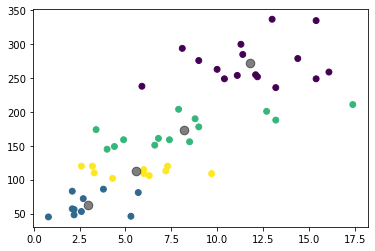

In [17]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c = labels, s = 35, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 75, alpha = 0.5)

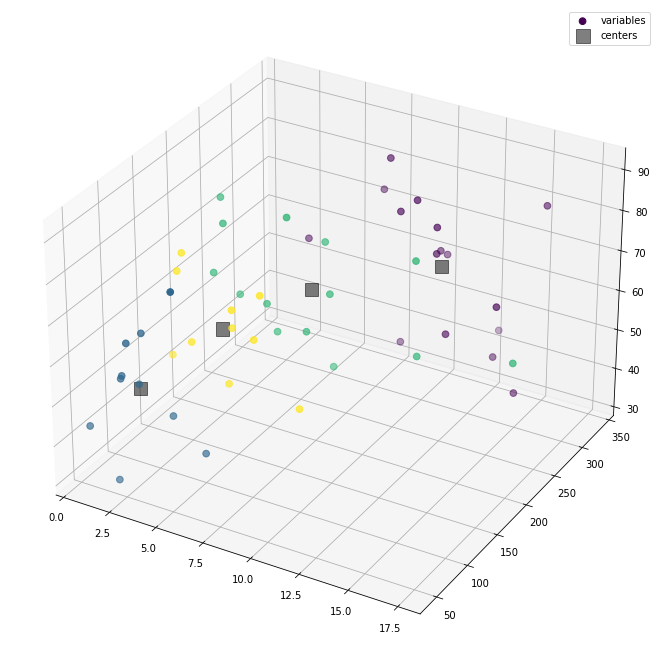

In [18]:
plt.rcParams['figure.figsize'] = (16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c = labels, s = 45, cmap = 'viridis');
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c = 'black', marker = 's' , s = 175, alpha = 0.5);
ax.legend(['variables','centers'])

In [58]:
clustered = pd.DataFrame({'State':df.index, 'Clusters': labels})

In [59]:
clustered.head()

,State,Clusters
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0


In [70]:
def risk(i):
    if i == 0:
        return 'Çok Yüksek'
    elif i == 1:
        return 'Yüksek'
    elif i == 2:
        return 'Normal'
    else:
        return 'Düşük'

In [71]:
clustered['Risk'] = clustered.Clusters.apply(risk)

In [73]:
clustered.head()

,State,Clusters,Risk
0,Alabama,0,Çok Yüksek
1,Alaska,0,Çok Yüksek
2,Arizona,0,Çok Yüksek
3,Arkansas,2,Normal
4,California,0,Çok Yüksek


In [74]:
#OPTIMUM CLUSTER SIZE

In [76]:
#!pip install yellowbrick

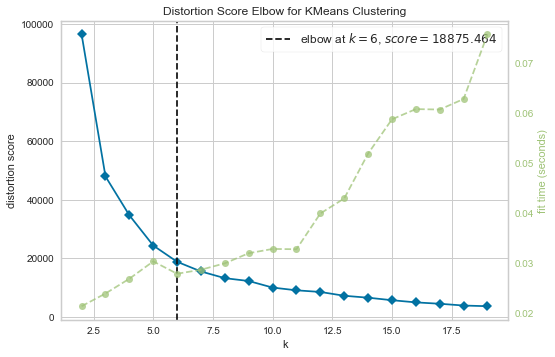

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
kmeans = KMeans()
visulazer = KElbowVisualizer(kmeans, k = (2,20))
visulazer.fit(df)
visulazer.poof()

In [97]:
clustered.sort_values(by = 'Clusters', ascending = False)

,State,Clusters,Risk
25,Montana,3,Düşük
26,Nebraska,3,Düşük
43,Utah,3,Düşük
16,Kentucky,3,Düşük
6,Connecticut,3,Düşük
15,Kansas,3,Düşük
34,Ohio,3,Düşük
37,Pennsylvania,3,Düşük
13,Indiana,3,Düşük
11,Idaho,3,Düşük
